   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 175GB/s]


✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_001_01.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_001_02.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_001_03.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_002_01.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_002_02.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_002_03.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_003_01.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_003_02.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_003_03.png
✅ Cleaned: /content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned/y_003_04.png
✅ Cleaned: /content/

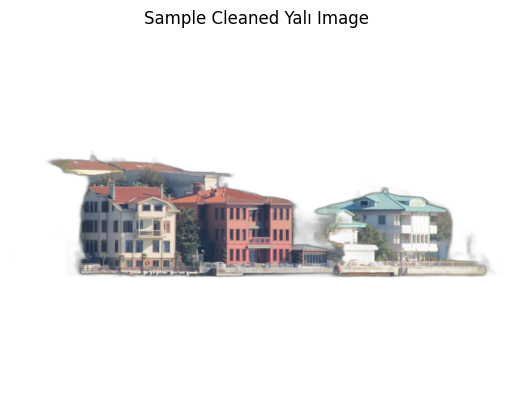

In [ ]:
# @title
# ✅ UPDATED: Pythonic Colab-Based Batch Background Removal Using backgroundremover API

# STEP 1: Install backgroundremover and dependencies
!pip install -q backgroundremover
!pip install -q rembg
!pip install onnxruntime

# STEP 2: Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

!ls "/content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/images"

# STEP 3: Import libraries
from rembg import remove
from PIL import Image
import numpy as np
from glob import glob

# STEP 4: Set folder paths
input_folder = "/content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/images"
output_folder = "/content/drive/MyDrive/MBL 559E - Group Project/Fourth Test/u2net_cleaned"
os.makedirs(output_folder, exist_ok=True)

# STEP 5: Batch background removal using Python API

# Include both .jpg and .jpeg files (case-insensitive)
image_paths = sorted(glob(os.path.join(input_folder, '*.*')))
image_paths = [p for p in image_paths if p.lower().endswith((".jpg", ".jpeg", ".png"))]
print(f"Found {len(image_paths)} images")

for img_path in image_paths:
    try:
        # Open image safely
        img = Image.open(img_path).convert("RGB")

        # Run U-2-Net background removal
        result = remove(img)

        # Prepare proper .png save path
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        save_path = os.path.join(output_folder, f"{base_name}.png")

        result.save(save_path)
        print(f"✅ Cleaned: {save_path}")

    except Exception as e:
        print(f"❌ Failed: {img_path} — {e}")

# STEP 6: Show sample result
import matplotlib.pyplot as plt

sample_outputs = sorted(glob(os.path.join(output_folder, '*.png')))
if sample_outputs:
    img = Image.open(sample_outputs[0])
    plt.imshow(img)
    plt.axis("off")
    plt.title("Sample Cleaned Yalı Image")
    plt.show()
else:
    print("⚠️ No cleaned images to preview.")


In [ ]:
pip show rembg

Name: rembg
Version: 2.0.66
Summary: Remove image background
Home-page: https://github.com/danielgatis/rembg
Author: Daniel Gatis
Author-email: danielgatis@gmail.com
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: jsonschema, numpy, opencv-python-headless, pillow, pooch, pymatting, scikit-image, scipy, tqdm
Required-by: 
